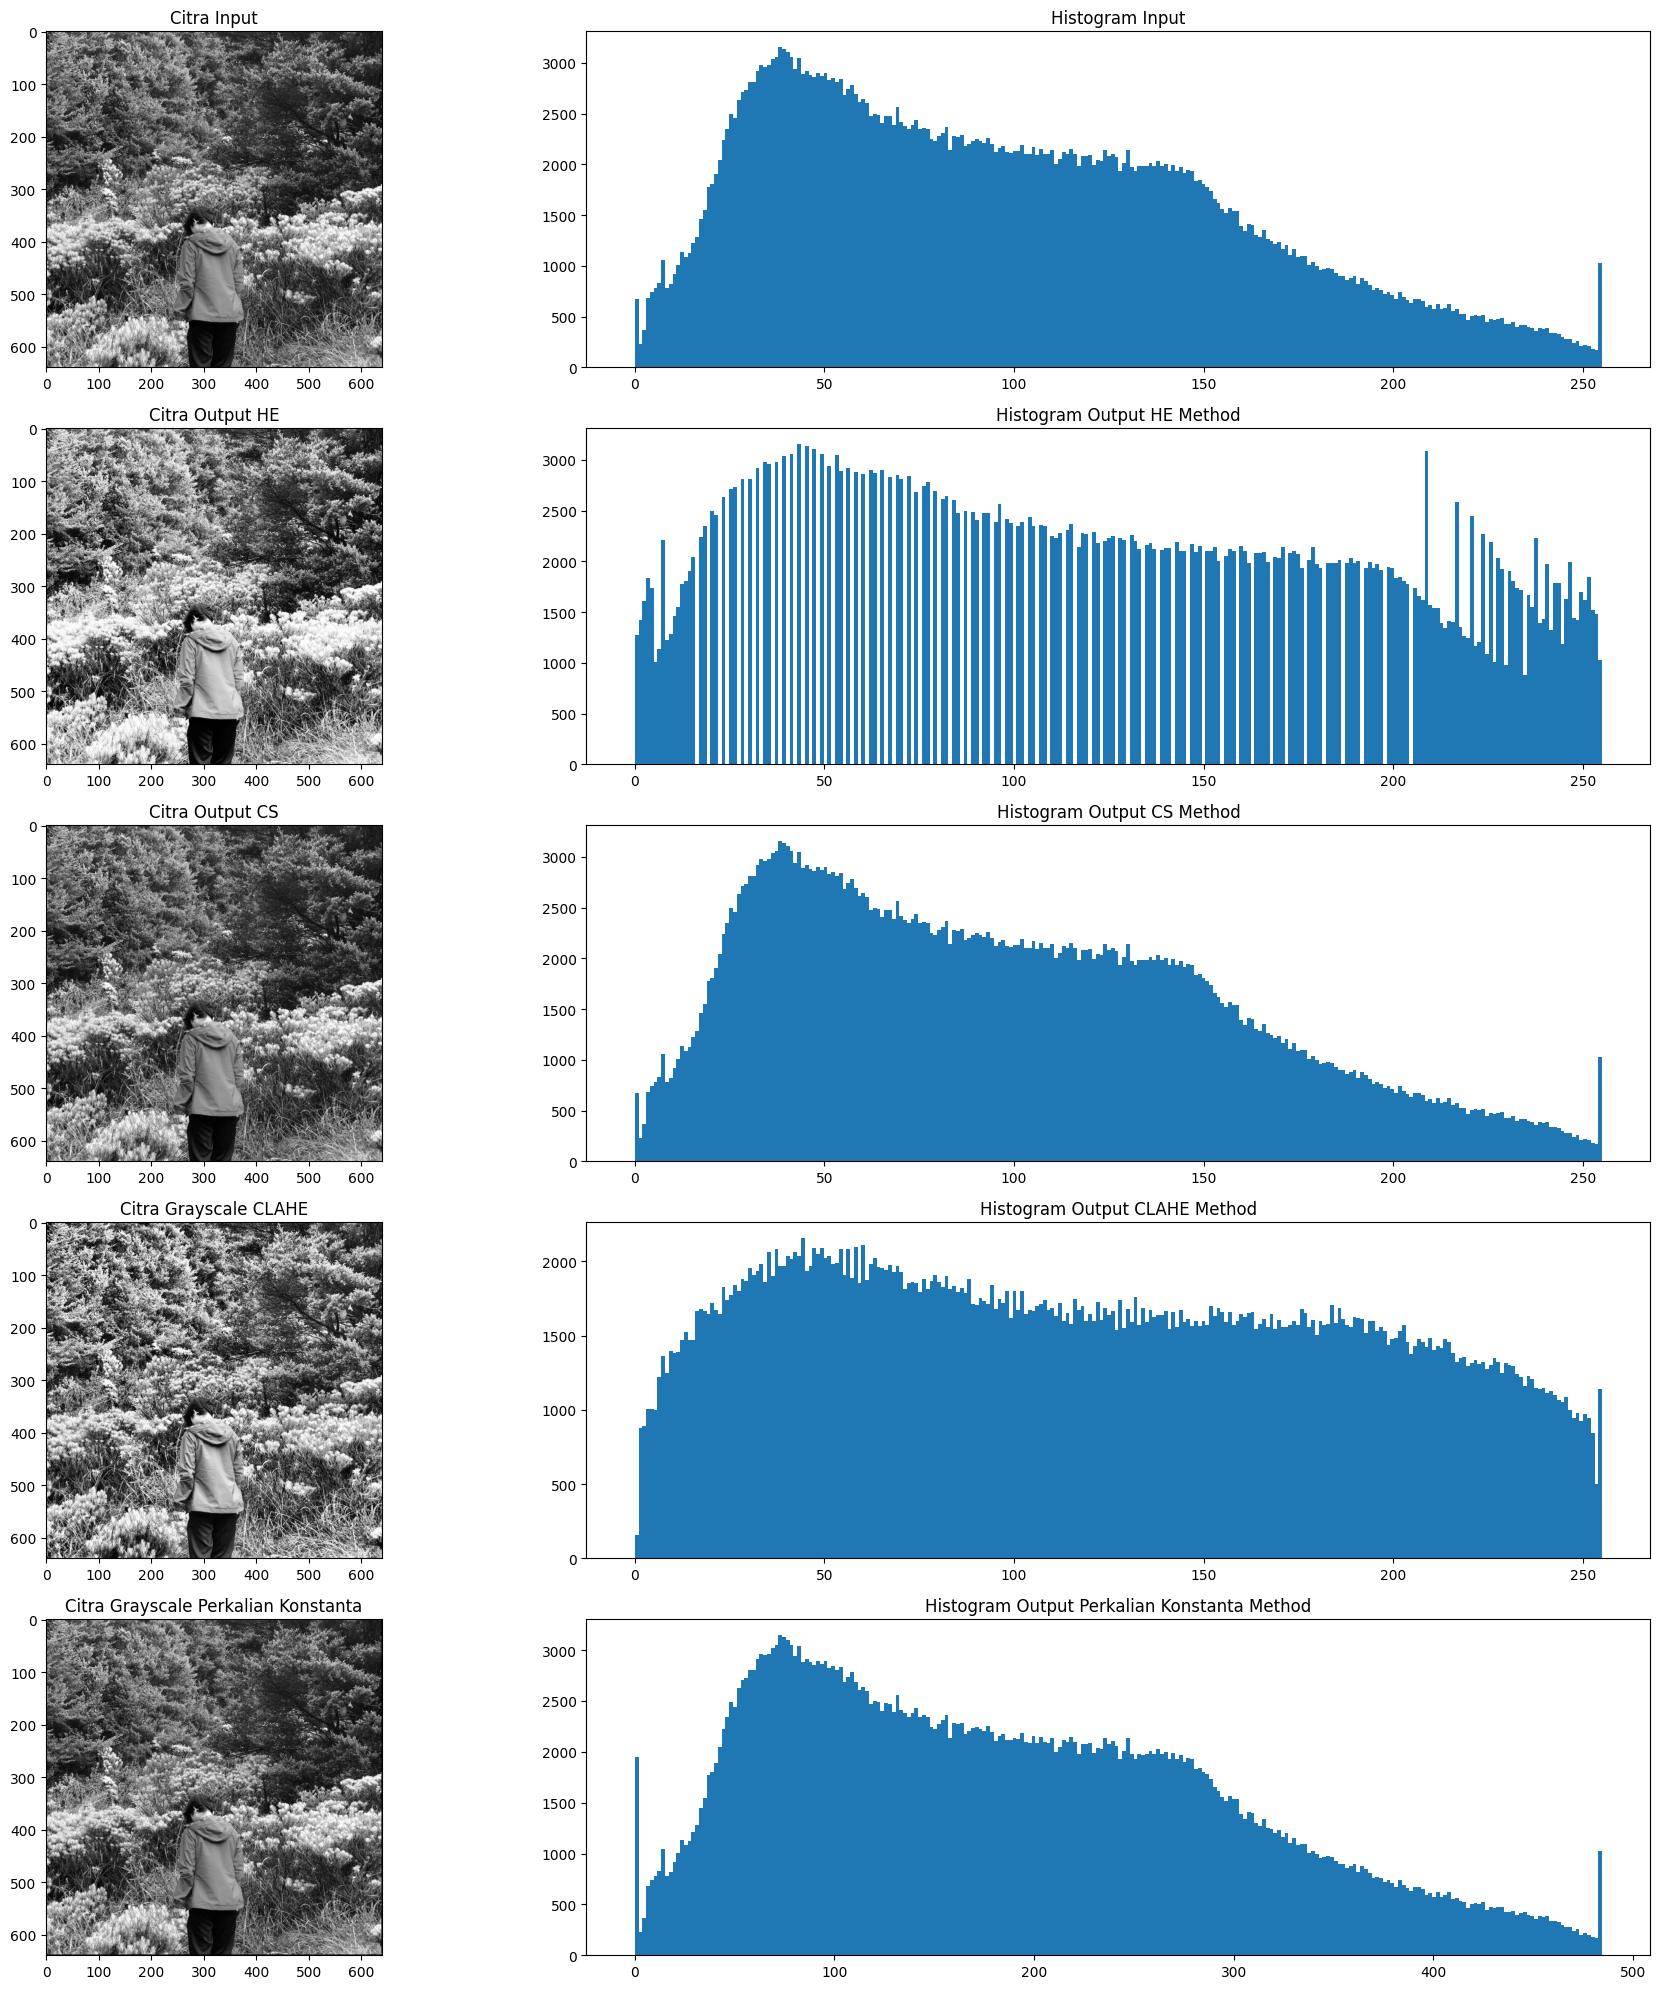

In [2]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import cv2

# membuat variabel image untuk membaca file rahmat.jpg
image = cv2.imread("rahmat.jpg", cv2.IMREAD_GRAYSCALE) # Membaca gambar dengan library opencv lalu dibuat terbaca dengan warna grayscale

# membuat variabel image_equalized untuk equalizing image
image_equalized = cv2.equalizeHist(image) # equalize berfungsi untuk meratakan intensitas pixel agar lebih merata untuk gambar pada  var. image

# Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
# Apply CLAHE to the original image
image_clahe = clahe.apply(image)

# Penerapan metode Contrast Stretching (CS)
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8') # Membuat array kosong dengan library numpy

# membuat variabel untuk menghitung nilai minimum dan maksimum dari image 
min = np.min(image)
max = np.max(image)

for i in range(image.shape[0]):  
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)


# Penerapan Metode Perkalian Konstanta
# Membuat variabel image2 yang isinya image dan mengubahnya menjadi tipe data float
image2 = image.copy().astype(float)

# Mendapatkan dimensi gambar
m1, n1 = image2.shape

# Membuat array kosong dengan dimensi yang sama dengan gambar 'image2'
output1 = np.empty([m1, n1])


for baris in range(0, m1-1):# Melakukan perulangan untuk setiap baris dalam gambar
    for kolom in range(0, n1-1):# Melakukan perulangan untuk setiap kolom dalam gambar 
        # Menginisialisasi variabel a1 dengan nilai baris dan variabel b1 dengan nilai kolom
        a1 = baris
        b1 = kolom       
        output1[a1, b1] = image2[baris, kolom] * 1.9 # Mengalikan piksel pada posisi (baris, kolom) dengan 1.9 dan menyimpan hasilnya di output1

# Menampilkan hasil semua dalam 1 figure 5 baris 2 kolom berukuran 20x20
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

#  baris 1 , kolom 1 dan 2
ax[0].imshow(image, cmap=plt.cm.gray) #  menampilkan gambar original
ax[0].set_title("Citra Input") # judul gambar
ax[1].hist(image.ravel(), bins=256) # menampilkan histogram dengan intensitas maksimal pixel 256
ax[1].set_title('Histogram Input') # judul histogram

#  baris 2 , kolom 1 dan 2
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

#  baris 3 , kolom 1 dan 2
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

#  baris 4 , kolom 1 dan 2
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

#  baris 5 , kolom 1 dan 2
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout() # membuat padding pada suplot agar lebih rapih